In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [78]:
path_prefix = './cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [79]:
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


## Data Preprocessing

In [80]:
#data clean
df_train.isnull().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

In [81]:
df_train.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

In [82]:
df_stock = pd.read_csv(path_prefix + 'auxiliary-data/auxiliary-data/sg-stock-prices.csv')
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock['date'] = df_stock['date'].dt.strftime('%Y-%m')
avg_adjusted_close = df_stock.groupby(['date'])['adjusted_close'].mean().reset_index()
df_train = pd.merge(df_train, avg_adjusted_close, left_on='rent_approval_date', right_on='date')
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,date,adjusted_close
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,2021-09,15.448564
1,2021-09,punggol,203a,punggol field,4 room,model a,85.0,yes,2004,1.398524,103.903863,0.0,matilda,punggol,north-east region,2400,2021-09,15.448564
2,2021-09,choa chu kang,458,choa chu kang avenue 4,executive,premium apartment,142.0,yes,2000,1.378101,103.736002,0.0,peng siang,choa chu kang,west region,1800,2021-09,15.448564
3,2021-09,sembawang,340a,sembawang close,5 room,premium apartment,110.0,yes,2001,1.447534,103.817892,0.0,sembawang central,sembawang,north region,2100,2021-09,15.448564
4,2021-09,bishan,117,bishan street 12,5 room,improved,121.0,yes,1987,1.347017,103.849987,0.0,bishan east,bishan,central region,2750,2021-09,15.448564


In [83]:
df_coe = pd.read_csv(path_prefix + 'auxiliary-data/auxiliary-data/sg-coe-prices.csv')
month_to_numeric = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september': 9,
    'october': 10,
    'november': 11,
    'december': 12
}

df_coe['month'] = df_coe['month'].apply(lambda x: month_to_numeric[x.lower()])
df_coe['month'] = df_coe['month'].apply(lambda x: f'{x:02d}')

df_coe['date'] = df_coe['year'].astype(str) + '-' + df_coe['month']
avg_price_bids_quota = df_coe.groupby('date').agg({
    'price': 'mean',
    'bids': 'mean',
    'quota': 'mean'
}).reset_index()

avg_price_bids_quota['bids_quota_ratio'] = avg_price_bids_quota['bids'] / avg_price_bids_quota['quota']
df_train = pd.merge(df_train, avg_price_bids_quota[['date', 'price', 'bids_quota_ratio']], left_on='rent_approval_date', right_on='date')
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,elevation,subzone,planning_area,region,monthly_rent,date_x,adjusted_close,date_y,price,bids_quota_ratio
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,0.0,yuhua east,jurong east,west region,1600,2021-09,15.448564,2021-09,54951.625,1.458595
1,2021-09,punggol,203a,punggol field,4 room,model a,85.0,yes,2004,1.398524,...,0.0,matilda,punggol,north-east region,2400,2021-09,15.448564,2021-09,54951.625,1.458595
2,2021-09,choa chu kang,458,choa chu kang avenue 4,executive,premium apartment,142.0,yes,2000,1.378101,...,0.0,peng siang,choa chu kang,west region,1800,2021-09,15.448564,2021-09,54951.625,1.458595
3,2021-09,sembawang,340a,sembawang close,5 room,premium apartment,110.0,yes,2001,1.447534,...,0.0,sembawang central,sembawang,north region,2100,2021-09,15.448564,2021-09,54951.625,1.458595
4,2021-09,bishan,117,bishan street 12,5 room,improved,121.0,yes,1987,1.347017,...,0.0,bishan east,bishan,central region,2750,2021-09,15.448564,2021-09,54951.625,1.458595


In [84]:
df_train.drop(columns=['date_x', 'date_y'], inplace=True)

In [85]:
df_train.describe()
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month/12 + df_train['rent_approval_date'].dt.year

In [92]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,elevation,subzone,planning_area,region,monthly_rent,adjusted_close,price,bids_quota_ratio,rent_approval_year,rent_approval_month
0,2021-09-01,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,0.0,yuhua east,jurong east,west region,1600,15.448564,54951.625,1.458595,2021,2021.75
1,2021-09-01,punggol,203a,punggol field,4 room,model a,85.0,yes,2004,1.398524,...,0.0,matilda,punggol,north-east region,2400,15.448564,54951.625,1.458595,2021,2021.75
2,2021-09-01,choa chu kang,458,choa chu kang avenue 4,executive,premium apartment,142.0,yes,2000,1.378101,...,0.0,peng siang,choa chu kang,west region,1800,15.448564,54951.625,1.458595,2021,2021.75
3,2021-09-01,sembawang,340a,sembawang close,5 room,premium apartment,110.0,yes,2001,1.447534,...,0.0,sembawang central,sembawang,north region,2100,15.448564,54951.625,1.458595,2021,2021.75
4,2021-09-01,bishan,117,bishan street 12,5 room,improved,121.0,yes,1987,1.347017,...,0.0,bishan east,bishan,central region,2750,15.448564,54951.625,1.458595,2021,2021.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2022-09-01,bukit panjang,623,Senja Road,5-room,improved,110.0,yes,2001,1.386256,...,0.0,senja,bukit panjang,west region,2750,9.344795,92942.625,1.394665,2022,2022.75
59996,2022-09-01,geylang,102,Aljunied Crescent,3-room,new generation,82.0,yes,1978,1.320481,...,0.0,aljunied,geylang,central region,2100,9.344795,92942.625,1.394665,2022,2022.75
59997,2022-09-01,bishan,443,sin ming avenue,4-room,model a,105.0,yes,1990,1.358948,...,0.0,upper thomson,bishan,central region,2050,9.344795,92942.625,1.394665,2022,2022.75
59998,2022-09-01,jurong east,227,jurong east street 21,5-room,improved,120.0,yes,1984,1.341821,...,0.0,yuhua east,jurong east,west region,2500,9.344795,92942.625,1.394665,2022,2022.75


<ipython-input-90-98778bfb0c87>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'adjusted_close', 'price', 'bids_quota_ratio', 'flat_model', 'monthly_rent']].corr()


<AxesSubplot:>

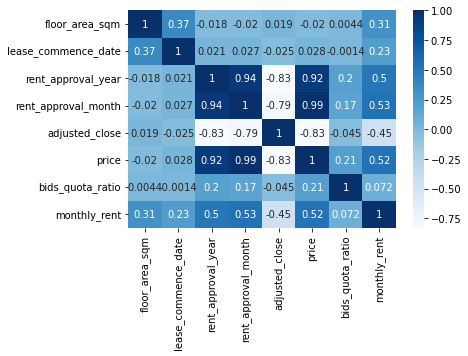

In [90]:
#draw corr heatmap
corr = df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'adjusted_close', 'price', 'bids_quota_ratio', 'flat_model', 'monthly_rent']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')


In [91]:
df_train.describe()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent,adjusted_close,price,bids_quota_ratio,rent_approval_year,rent_approval_month
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,94.480458,1990.876367,1.359443,103.840110,0.0,2590.328333,11.872900,75173.627058,1.476214,2021.813050,2022.299508
std,24.082642,12.141435,0.042505,0.071627,0.0,714.910468,2.506630,21312.751456,0.080382,0.780006,0.758707
min,34.000000,1966.000000,1.270380,103.685228,0.0,300.000000,8.983589,43812.000000,1.344763,2021.000000,2021.083333
25%,73.000000,1981.000000,1.330939,103.778803,0.0,2100.000000,9.487512,52199.625000,1.419904,2021.000000,2021.666667
50%,93.000000,1988.000000,1.354024,103.845301,0.0,2400.000000,11.224848,77035.625000,1.456284,2022.000000,2022.250000
75%,110.000000,2000.000000,1.386968,103.897418,0.0,3000.000000,13.856788,96230.250000,1.533866,2022.000000,2023.000000
max,215.000000,2019.000000,1.457071,103.964915,0.0,6950.000000,17.422356,105592.375000,1.664336,2023.000000,2023.583333


In [93]:
#draw corr distribution plot
sns.pairplot(df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'adjusted_close', 'price', 'bids_quota_ratio', 'monthly_rent']], diag_kind='kde', kind='reg')


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f96fbbfcca0> (for post_execute):


KeyboardInterrupt: 

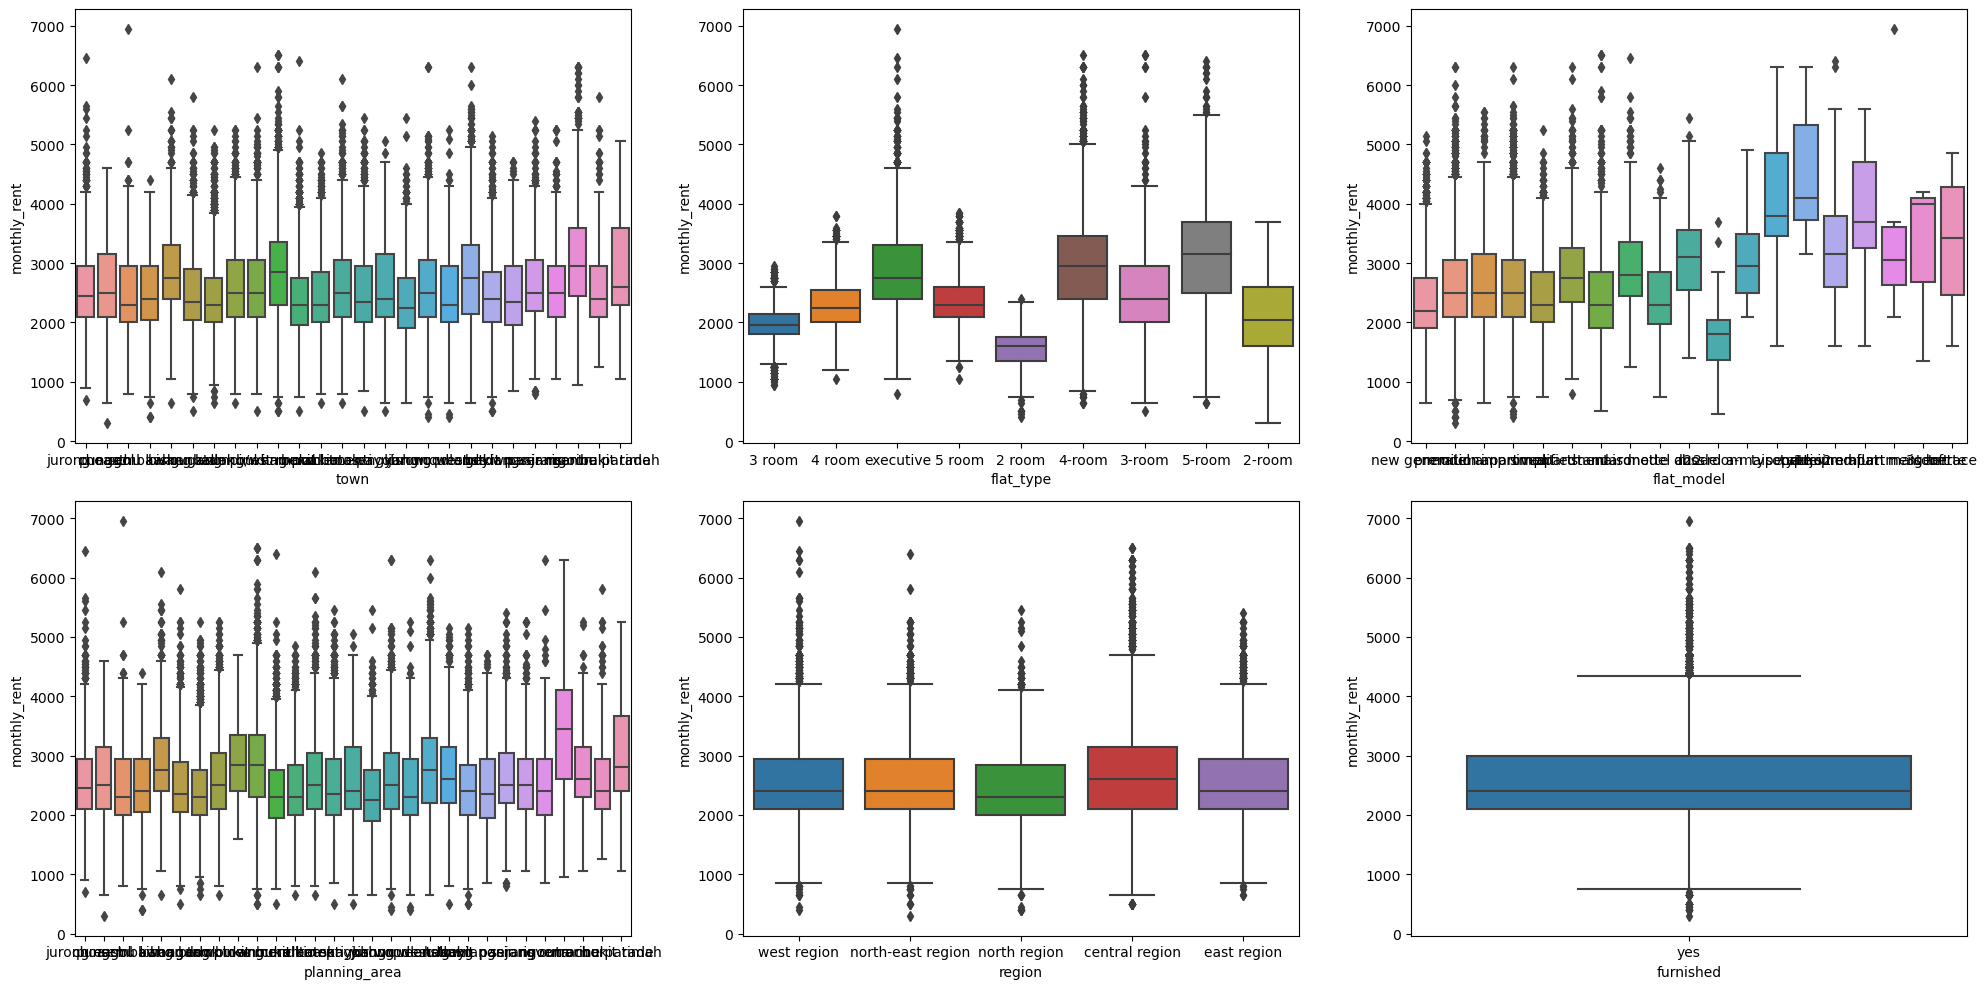

In [33]:
#draw distribution for categorical variables and monthly rent
#town	street_name	flat_type	flat_model	subzone	planning_area	region
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(x='town', y='monthly_rent', data=df_train, ax=ax[0, 0])
sns.boxplot(x='flat_type', y='monthly_rent', data=df_train, ax=ax[0, 1])
sns.boxplot(x='flat_model', y='monthly_rent', data=df_train, ax=ax[0, 2])
sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train, ax=ax[1, 1])
sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
plt.tight_layout()



In [94]:
#remove '-'
df_train['flat_type'] = df_train['flat_type'].str.replace('-', ' ')
df_train['flat_model'] = df_train['flat_model'].str.replace('-', ' ')

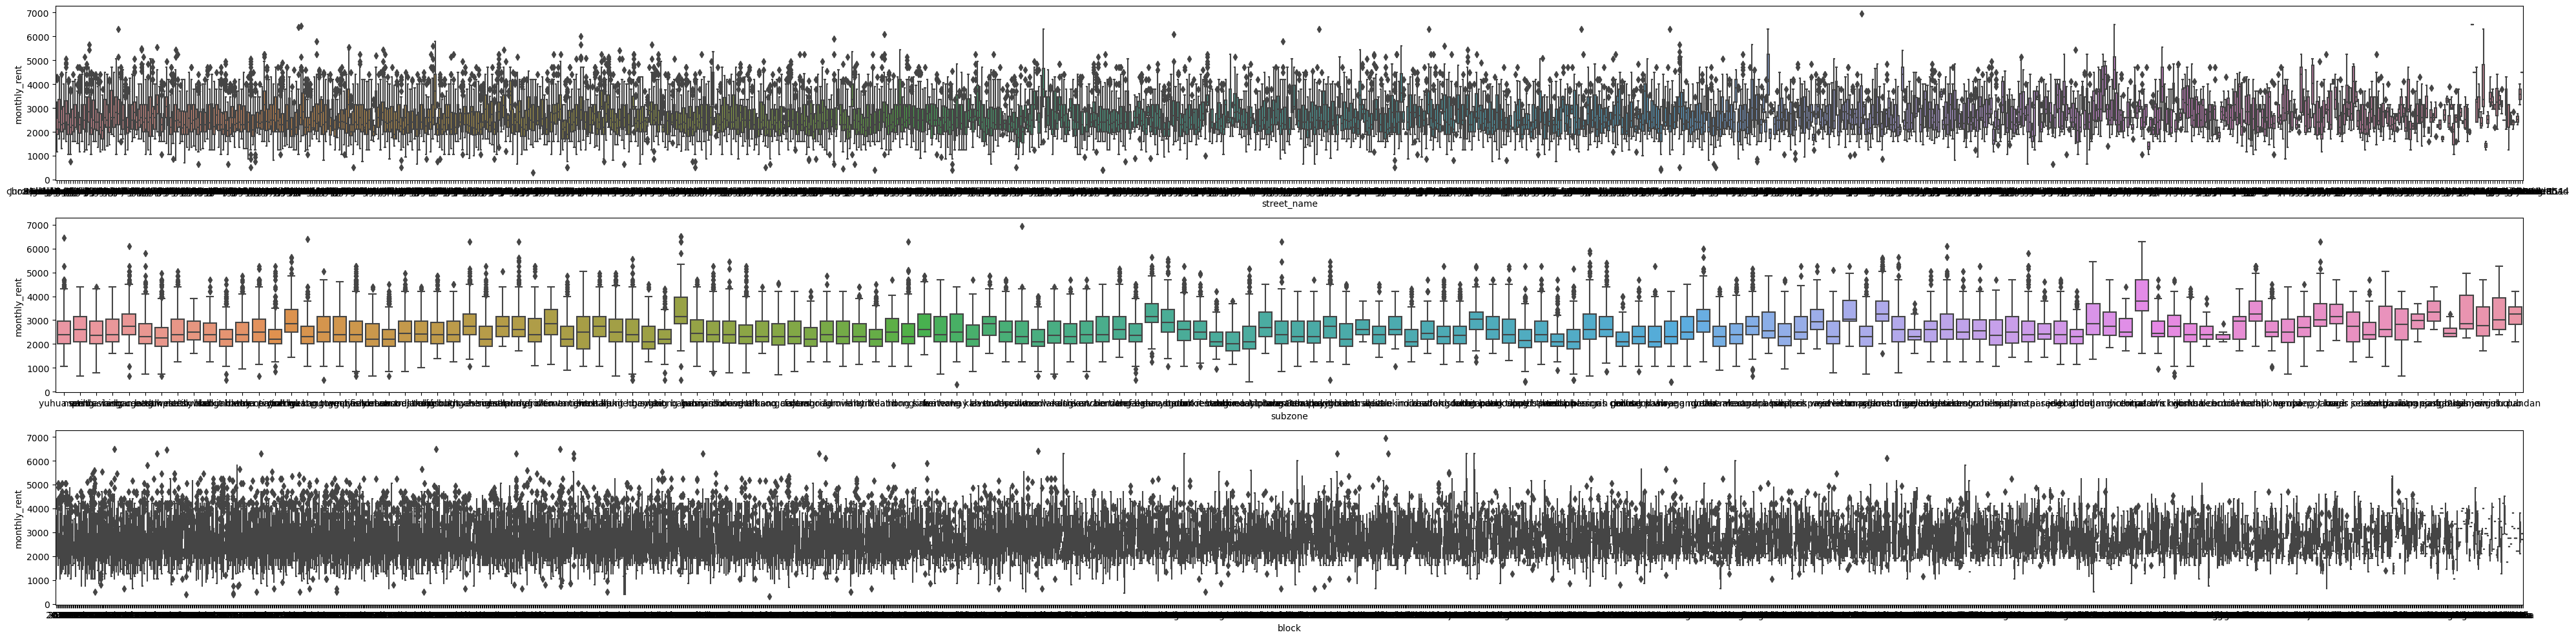

In [35]:
fig, ax = plt.subplots(3, 1, figsize=(40, 10))
sns.boxplot(x='street_name', y='monthly_rent', data=df_train, ax=ax[0,])
sns.boxplot(x='subzone', y='monthly_rent', data=df_train, ax=ax[1,])
sns.boxplot(x='block', y='monthly_rent', data=df_train, ax=ax[2,])
plt.tight_layout()

In [95]:
#map all categorical variables to the mean of monthly rent
def category_map_mean(df_origin):
    df = df_origin.copy()
    #map town decrease order
    grouby_town = df_train.groupby('town')['monthly_rent'].mean()
    town_map = grouby_town.index
    town_map_dict = {town_map[i]: grouby_town[town_map[i]] for i in range(len(town_map))}
    df['town'] = df['town'].apply(lambda x: town_map_dict[x] if x in town_map_dict else grouby_town.mean())

    #map block decrease order
    grouby_block = df_train.groupby('block')['monthly_rent'].mean()
    block_map = grouby_block.index
    block_map_dict = {block_map[i]: grouby_block[block_map[i]] for i in range(len(block_map))}
    df['block'] = df['block'].apply(lambda x: block_map_dict[x] if x in block_map_dict else grouby_block.mean())

    #map flat_type decrease order
    grouby_flat_type = df_train.groupby('flat_type')['monthly_rent'].mean()
    flat_type_map = grouby_flat_type.index
    flat_type_map_dict = {flat_type_map[i]: grouby_flat_type[flat_type_map[i]] for i in range(len(flat_type_map))}
    df['flat_type'] = df['flat_type'].apply(lambda x: flat_type_map_dict[x] if x in flat_type_map_dict else grouby_flat_type.mean())

    #map flat_model decrease order
    grouby_flat_model = df_train.groupby('flat_model')['monthly_rent'].mean()
    flat_model_map = grouby_flat_model.index
    flat_model_map_dict = {flat_model_map[i]: grouby_flat_model[flat_model_map[i]] for i in range(len(flat_model_map))}
    df['flat_model'] = df['flat_model'].apply(lambda x: flat_model_map_dict[x] if x in flat_model_map_dict else grouby_flat_model.mean())

    #map planning_area decrease order
    grouby_planning_area = df_train.groupby('planning_area')['monthly_rent'].mean()
    planning_area_map = grouby_planning_area.index
    planning_area_map_dict = {planning_area_map[i]: grouby_planning_area[planning_area_map[i]] for i in range(len(planning_area_map))}
    df['planning_area'] = df['planning_area'].apply(lambda x: planning_area_map_dict[x] if x in planning_area_map_dict else grouby_planning_area.mean())

    #map region decrease order
    grouby_region = df_train.groupby('region')['monthly_rent'].mean()
    region_map = grouby_region.index
    region_map_dict = {region_map[i]: grouby_region[region_map[i]] for i in range(len(region_map))}
    df['region'] = df['region'].apply(lambda x: region_map_dict[x] if x in region_map_dict else grouby_region.mean())

    #map street_name decrease order
    grouby_street_name = df_train.groupby('street_name')['monthly_rent'].mean()
    street_name_map = grouby_street_name.index
    street_name_map_dict = {street_name_map[i]: grouby_street_name[street_name_map[i]] for i in range(len(street_name_map))}
    df['street_name'] = df['street_name'].apply(lambda x: street_name_map_dict[x] if x in street_name_map_dict else grouby_street_name.mean())

    #map subzone decrease order
    grouby_subzone = df_train.groupby('subzone')['monthly_rent'].mean()
    subzone_map = grouby_subzone.index
    subzone_map_dict = {subzone_map[i]: grouby_subzone[subzone_map[i]] for i in range(len(subzone_map))}
    df['subzone'] = df['subzone'].apply(lambda x: subzone_map_dict[x] if x in subzone_map_dict else grouby_subzone.mean())

    #map rent_approval_date decrease order
    grouby_rent_approval_date = df_train.groupby('rent_approval_date')['monthly_rent'].mean()
    rent_approval_date_map = grouby_rent_approval_date.index
    rent_approval_date_map_dict = {rent_approval_date_map[i]: grouby_rent_approval_date[rent_approval_date_map[i]] for i in range(len(rent_approval_date_map))}
    df['rent_approval_date_mean'] = df['rent_approval_date'].apply(lambda x: rent_approval_date_map_dict[x] if x in rent_approval_date_map_dict else grouby_rent_approval_date.mean())

    
    

    return df

In [96]:
df_train_map_mean = category_map_mean(df_train)
df_train_map_mean.drop(['elevation'], axis=1, inplace=True)
df_train_map_mean.drop(['furnished'], axis=1, inplace=True)
df_train_map_mean.drop(['rent_approval_date'], axis=1, inplace=True)
#df_train_map_mean.drop(['latitude'], axis=1, inplace=True)
#df_train_map_mean.drop(['longitude'], axis=1, inplace=True)
df_train_map_mean

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region,monthly_rent,adjusted_close,price,bids_quota_ratio,rent_approval_year,rent_approval_month,rent_approval_date_mean
0,2595.146199,2464.285714,2282.692308,2276.033233,2369.965462,67.0,1983,1.344518,103.738630,2542.158516,2595.146199,2569.167537,1600,15.448564,54951.625,1.458595,2021,2021.75,2233.926780
1,2665.555556,2725.000000,2703.583618,2692.359176,2612.031305,85.0,2004,1.398524,103.903863,2695.619835,2665.555556,2558.822710,2400,15.448564,54951.625,1.458595,2021,2021.75,2233.926780
2,2502.574398,2617.164179,2476.315789,2892.857143,2709.678998,142.0,2000,1.378101,103.736002,2509.045226,2502.574398,2569.167537,1800,15.448564,54951.625,1.458595,2021,2021.75,2233.926780
3,2540.491010,2140.000000,2594.444444,2815.593875,2709.678998,110.0,2001,1.447534,103.817892,2592.332790,2540.491010,2450.623806,2100,15.448564,54951.625,1.458595,2021,2021.75,2233.926780
4,2867.049408,2450.297619,2906.645570,2815.593875,2636.211052,121.0,1987,1.347017,103.849987,2892.229730,2867.049408,2737.201353,2750,15.448564,54951.625,1.458595,2021,2021.75,2233.926780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2493.746111,2396.296296,2501.327434,2815.593875,2636.211052,110.0,2001,1.386256,103.762201,2499.688474,2493.746111,2569.167537,2750,9.344795,92942.625,1.394665,2022,2022.75,2812.587413
59996,2484.265734,2485.000000,2443.636364,2276.033233,2369.965462,82.0,1978,1.320481,103.882473,2604.452055,2484.265734,2737.201353,2100,9.344795,92942.625,1.394665,2022,2022.75,2812.587413
59997,2867.049408,2364.102564,2703.061224,2692.359176,2612.031305,105.0,1990,1.358948,103.832788,2590.533333,2867.049408,2737.201353,2050,9.344795,92942.625,1.394665,2022,2022.75,2812.587413
59998,2595.146199,2466.091954,2728.925620,2815.593875,2636.211052,120.0,1984,1.341821,103.736088,2542.158516,2595.146199,2569.167537,2500,9.344795,92942.625,1.394665,2022,2022.75,2812.587413


Index(['town', 'block', 'street_name', 'flat_type', 'flat_model',
       'floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude',
       'subzone', 'planning_area', 'region', 'monthly_rent', 'adjusted_close',
       'price', 'bids_quota_ratio', 'rent_approval_year',
       'rent_approval_month', 'rent_approval_date_mean'],
      dtype='object')

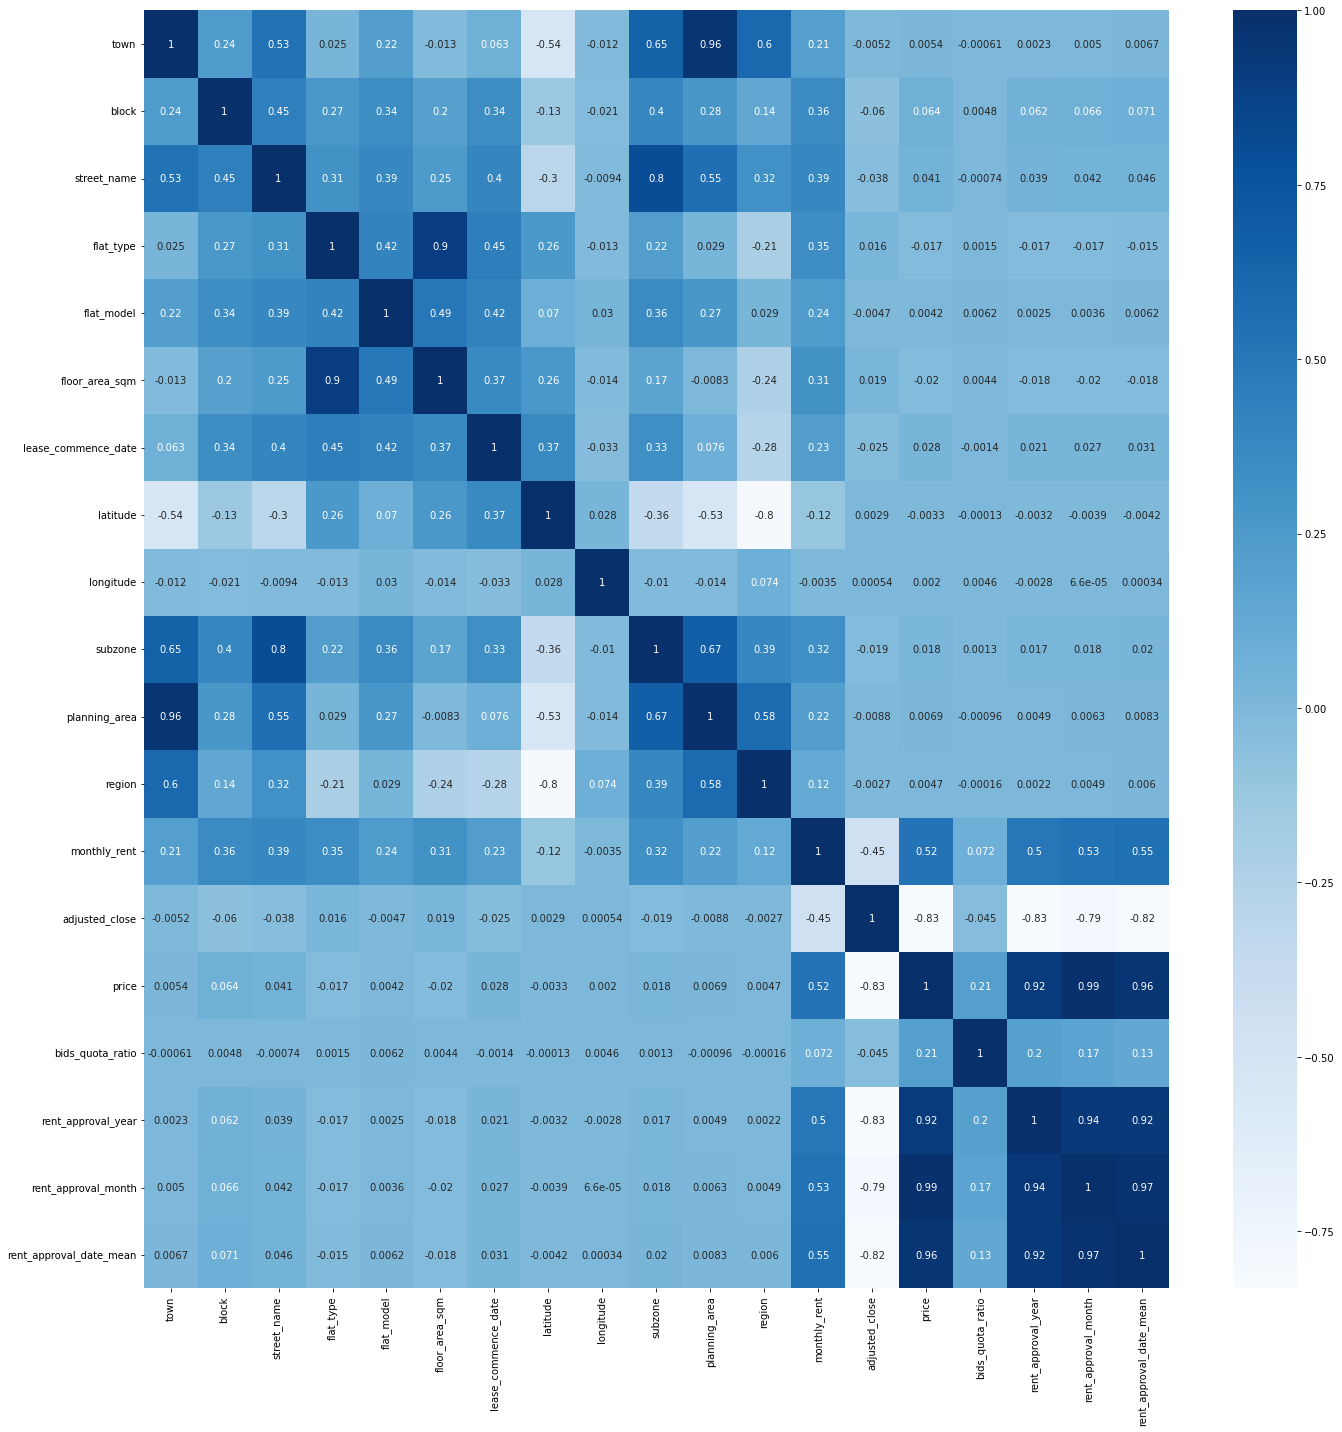

In [97]:
plt.figure(figsize=(20, 20))
corr = df_train_map_mean.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()
df_train_map_mean.columns

In [39]:
#draw latitude and longitude on map
import nbformat
print(nbformat.__version__)
fig = px.scatter_geo(df_train_map_mean[:10000], lat='latitude', lon='longitude', color='monthly_rent', hover_name='block', projection='natural earth')
fig.show()


5.9.2


## try with attributes > 0.3
* block
* street_name
* flat_type
* floor_area_sqm
* subzone
* rent_approval_date_mean
* price
## with method
* xgboost
* lgbm

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [164]:
def data_preprocess(df):
    df = df.copy()
    df_coe = pd.read_csv(path_prefix + 'auxiliary-data/auxiliary-data/sg-coe-prices.csv')
    month_to_numeric = {
        'january': 1,
        'february': 2,
        'march': 3,
        'april': 4,
        'may': 5,
        'june': 6,
        'july': 7,
        'august': 8,
        'september': 9,
        'october': 10,
        'november': 11,
        'december': 12
    }

    df_coe['month'] = df_coe['month'].apply(lambda x: month_to_numeric[x.lower()])
    df_coe['month'] = df_coe['month'].apply(lambda x: f'{x:02d}')

    df_coe['date'] = df_coe['year'].astype(str) + '-' + df_coe['month']
    df_coe = df_coe[['date', 'price']]
    avg_price_bids_quota = df_coe.groupby('date').mean().reset_index()

    df['price'] = df['rent_approval_date'].apply(lambda x: avg_price_bids_quota[avg_price_bids_quota['date'] == x]['price'].values[0])

    df['flat_type'] = df['flat_type'].str.replace('-', ' ')
    df = category_map_mean(df)
    df.drop(['elevation'], axis=1, inplace=True)
    df.drop(['furnished'], axis=1, inplace=True)
    df.drop(['latitude'], axis=1, inplace=True)
    df.drop(['longitude'], axis=1, inplace=True)
    df['rent_date'] = pd.to_datetime(df['rent_approval_date']).dt.year + pd.to_datetime(df['rent_approval_date']).dt.month/12
    df.drop(['rent_approval_date'], axis=1, inplace=True)
    
    df = df[['block', 'street_name', 'flat_type', 'town', 'floor_area_sqm', 'planning_area','subzone', 'rent_approval_date_mean', 'price','rent_date']]

    return df

In [165]:
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [166]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200
59996,2023-04,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100
59997,2022-06,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250
59998,2023-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700


In [167]:
#count test data has block in train data
df_train_block = df_train['block'].unique()
print(len(df_train_block))
df_test_block = df_test['block']
count = 0
for i in range(len(df_test_block)):
    if df_test_block[i] in df_train_block:
        count += 1
print(count)

2553
29921


In [168]:
df_train_X = data_preprocess(df_train)
#df_train_X = df_train_X.drop(['monthly_rent'], axis=1)
df_train_y = df_train['monthly_rent']
df_test_X = data_preprocess(df_test)
df_test_X

,block,street_name,flat_type,town,floor_area_sqm,planning_area,subzone,rent_approval_date_mean,price,rent_date
0,2625.000000,2375.000000,2400.673617,2503.252886,121.0,2503.252886,2427.604167,3069.581639,92845.000,2023.083333
1,2522.916667,2616.666667,2302.270969,2540.491010,100.0,2540.491010,2592.332790,2812.587413,92942.625,2022.750000
2,2700.000000,2567.261905,2302.270969,2646.808979,91.0,2646.808979,2395.588235,3262.248898,104442.375,2023.583333
3,2515.333333,2829.629630,1974.144364,2595.146199,74.0,2595.146199,2400.150150,2249.901768,51997.375,2021.666667
4,2610.215054,2280.416667,2400.673617,2595.146199,121.0,2595.146199,2400.150150,2449.322430,79016.000,2022.250000
...,...,...,...,...,...,...,...,...,...,...
29995,2766.666667,2568.143460,2302.270969,2665.555556,92.0,2665.555556,2654.294479,2755.309735,90883.875,2022.666667
29996,2178.947368,2388.732394,2302.270969,2540.491010,90.0,2540.491010,2473.678647,3103.949406,98624.125,2023.166667
29997,2464.035088,2264.655172,1974.144364,2416.700057,68.0,2416.700057,2378.606965,3189.212679,103440.750,2023.416667
29998,2946.153846,2526.829268,2892.857143,2466.298251,144.0,2466.298251,2497.040971,3103.949406,98624.125,2023.166667


In [169]:
df_train_X

,block,street_name,flat_type,town,floor_area_sqm,planning_area,subzone,rent_approval_date_mean,price,rent_date
0,2464.285714,2282.692308,1974.144364,2595.146199,67.0,2595.146199,2542.158516,2233.926780,54951.625,2021.750000
1,2357.720588,2384.124088,2302.270969,2438.227223,92.0,2438.227223,2360.371046,2517.128874,77035.625,2022.416667
2,2428.873239,2402.484472,1974.144364,2516.680515,67.0,2516.680515,2808.893871,2928.483245,89580.250,2022.833333
3,2375.714286,2691.237113,2892.857143,2686.857477,149.0,2686.857477,2610.338573,2249.901768,51997.375,2021.666667
4,2470.681818,2261.363636,1974.144364,2665.537634,68.0,2702.635659,2793.525180,2986.739659,99472.875,2022.916667
...,...,...,...,...,...,...,...,...,...,...
59995,2505.714286,2368.501529,1974.144364,2416.700057,67.0,2416.700057,2390.887097,2233.926780,54951.625,2021.750000
59996,3850.000000,3512.500000,2302.270969,2904.113924,83.0,2904.113924,2694.936709,3178.128128,104404.750,2023.333333
59997,2900.000000,2552.564103,2400.673617,2638.489123,122.0,2638.489123,2602.823315,2582.606383,83323.125,2022.500000
59998,2566.981132,2570.967742,2400.673617,2438.227223,123.0,2438.227223,2434.379786,3069.581639,92845.000,2023.083333


In [170]:
from scipy import stats

z_scores = stats.zscore(df_train_X)

threshold = 3

outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
print(len(outlier_indices))

df_train_X = df_train_X.drop(outlier_indices)
df_train_y = df_train_y.drop(outlier_indices)

df_train_X.reset_index(drop=True, inplace=True)
df_train_y.reset_index(drop=True, inplace=True)

print(df_train_X)

4569
             block  street_name    flat_type         town  floor_area_sqm  \
0      2464.285714  2282.692308  1974.144364  2595.146199            67.0   
1      2357.720588  2384.124088  2302.270969  2438.227223            92.0   
2      2428.873239  2402.484472  1974.144364  2516.680515            67.0   
3      2375.714286  2691.237113  2892.857143  2686.857477           149.0   
4      2470.681818  2261.363636  1974.144364  2665.537634            68.0   
...            ...          ...          ...          ...             ...   
57076  2393.181818  2569.047619  1974.144364  2484.265734            68.0   
57077  2505.714286  2368.501529  1974.144364  2416.700057            67.0   
57078  2900.000000  2552.564103  2400.673617  2638.489123           122.0   
57079  2566.981132  2570.967742  2400.673617  2438.227223           123.0   
57080  2360.714286  2368.501529  1974.144364  2416.700057            67.0   

       planning_area      subzone  rent_approval_date_mean      price 

In [171]:
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [172]:
#cut 30% data as validation set
X_train, X_val, y_train, y_val = train_test_split(df_train_X, df_train_y, test_size=0.3, random_state=19260817)

MAE:  362.9340121820826
RMSE:  477.15874231612617


<AxesSubplot:>

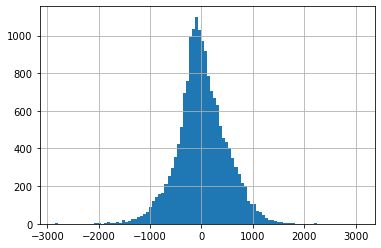

In [173]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.01,
    )
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_val)
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

In [126]:
#make submission
xgb_regressor = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    )

xgb_regressor.fit(df_train_X, df_train_y)


submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = xgb_regressor.predict(df_test_X)

submission.to_csv('submission.csv', index=False)

MAE:  384.70718534905103
RMSE:  509.8019080397552


<AxesSubplot:>

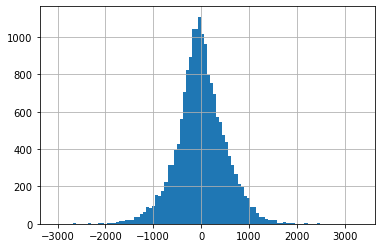

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = DecisionTreeRegressor()
model = RandomForestRegressor()
#model = GradientBoostingRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)


LGBM MAE:  363.24254149404527
LGBM RMSE:  476.8784051300557


<AxesSubplot:>

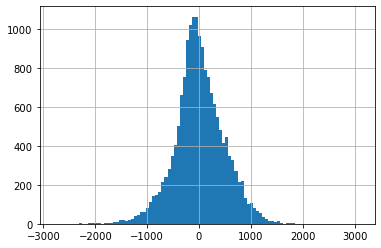

In [174]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=1000,
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)



In [163]:
#submit with LGBM
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=1000,
)

LGBM.fit(df_train_X, df_train_y)

submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = LGBM.predict(df_test_X)

submission.to_csv('submission.csv', index=False)



In [46]:
#feature importance
lgb_model = LGBMRegressor()
features = X_train.columns
dict_feature_importance = {}

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_val)

original_rmse = mean_squared_error(y_val, y_pred, squared=False)

for feature in features:
    X_train_tmp = X_train.drop([feature], axis=1)
    X_val_tmp = X_val.drop([feature], axis=1)
    lgb_model.fit(X_train_tmp, y_train)
    y_pred = lgb_model.predict(X_val_tmp)
    dict_feature_importance[feature] = mean_squared_error(y_val, y_pred, squared=False) - original_rmse


In [47]:
for feature in features:
    print(feature, '\t\t', dict_feature_importance[feature])

block 		 6.781290413628653
street_name 		 3.2325207099596582
flat_type 		 0.8867685255146398
floor_area_sqm 		 0.10900175724748351
subzone 		 4.340516944205319
rent_approval_date_mean 		 -0.10558833569683657
adjusted_close 		 -0.4333536304993686
price 		 -0.13245692856355618


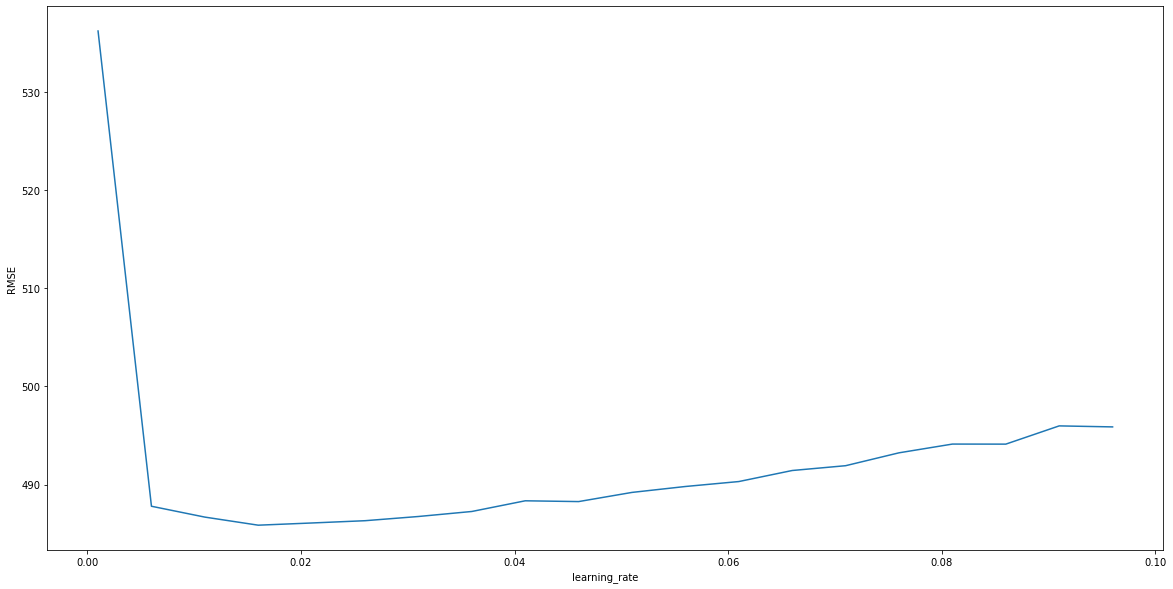

In [48]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.1, 0.005))
LGBM_RMSE_list = []
for learning_rate in learning_rate_list:
    LGBM = LGBMRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(learning_rate_list, LGBM_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()

In [52]:
print(learning_rate_list)
print(LGBM_RMSE_list)

[0.001, 0.006, 0.011, 0.016, 0.021, 0.026000000000000002, 0.031, 0.036000000000000004, 0.041, 0.046, 0.051000000000000004, 0.056, 0.061, 0.066, 0.07100000000000001, 0.076, 0.081, 0.08600000000000001, 0.091, 0.096]
[505.1465763362904, 492.54442895346574, 489.5115007436877, 488.12749381424715, 487.234967598313, 486.43030080137646, 486.5828965446134, 486.6669251273495, 486.63124548097124, 486.7582304233197, 486.6311661213862, 486.47709292086125, 486.510545132065, 486.4096140437656, 486.5259098679828, 486.6720949618832, 486.42651059255394, 486.4040339790541, 486.4040339790541]


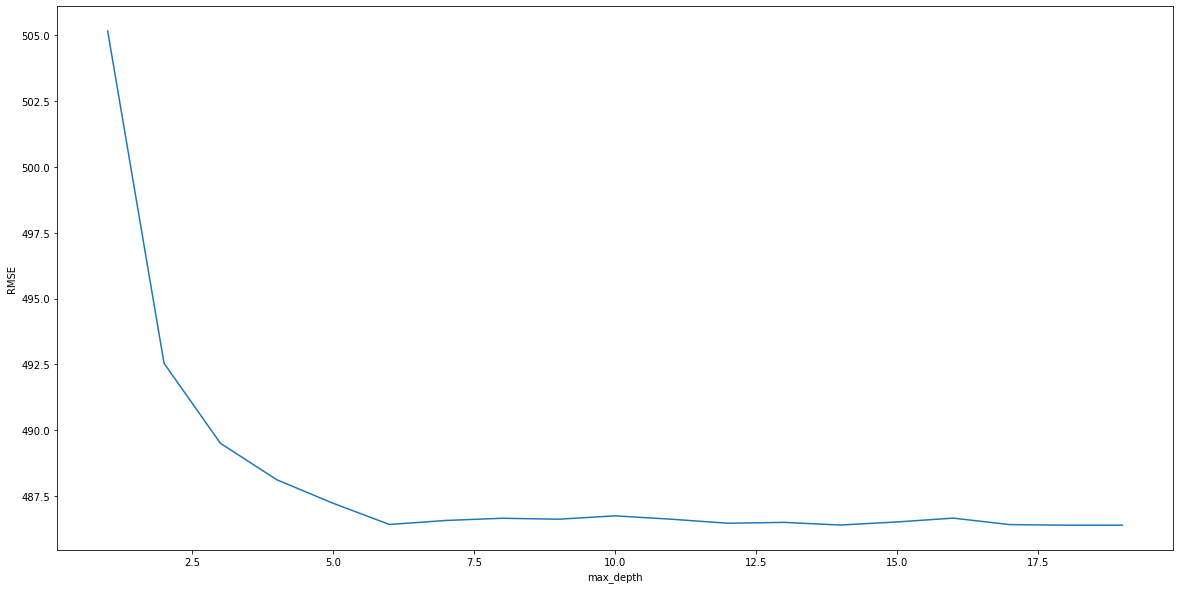

In [49]:
#tuning with different depth
max_depth_list = list(np.arange(1, 20, 1))
LGBM_RMSE_list = []
for max_depth in max_depth_list:
    LGBM = LGBMRegressor(
        learning_rate=0.01,
        n_estimators=1000,
        max_depth=max_depth
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(max_depth_list, LGBM_RMSE_list)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

In [50]:
#tuning parameters with grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': list(np.arange(1, 20, 1)),
    'num_leaves': list(np.arange(2, 100, 1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))


Fitting 5 folds for each of 1862 candidates, totalling 9310 fits
参数的最佳取值:{'max_depth': 8, 'num_leaves': 99}
最佳模型得分:-525.6642401884303


In [51]:
param_grid = {
    'min_child_samples': list(np.arange(1, 100, 1)),
    'min_child_weight': list(np.arange(0.001, 0.1, 0.001)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=grid_search.best_params_['max_depth'],
    num_leaves=grid_search.best_params_['num_leaves'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

Fitting 5 folds for each of 9801 candidates, totalling 49005 fits


KeyboardInterrupt: 

In [ ]:
param_grid = {
    'bagging_fraction': list(np.arange(0.5, 1, 0.1)),
    'bagging_freq': list(np.arange(2, 10, 1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=9,
    num_leaves=99,
    min_child_samples=grid_search.best_params_['min_child_samples'],
    min_child_weight=grid_search.best_params_['min_child_weight'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

In [ ]:
param_grid = {
    'reg_alpha': list(np.arange(0, 1, 0.1)),
    'reg_lambda': list(np.arange(0, 1, 0.1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=9,
    num_leaves=99,
    min_child_samples=27,
    min_child_weight=0.001,
    bagging_fraction=grid_search.best_params_['bagging_fraction'],
    bagging_freq=grid_search.best_params_['bagging_freq'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

In [ ]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=50000,
    max_depth=9,
    num_leaves=99,
    min_child_samples=27,
    min_child_weight=0.001,
    bagging_fraction=0.5,
    bagging_freq=2,
    reg_alpha=grid_search.best_params_['reg_alpha'],
    reg_lambda=grid_search.best_params_['reg_lambda'],
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

In [ ]:
xgb = XGBRegressor(
    learning_rate=0.01,
    n_estimators=1000,
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
print('XGB MAE: ', mean_absolute_error(y_val, y_pred))
print('XGB RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

In [ ]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.02, 0.001))
XGB_RMSE_list = []
for learning_rate in learning_rate_list:
    xgb = XGBRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_val)
    XGB_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.plot(learning_rate_list, XGB_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks


In [ ]:
def build_model(dim, activation='relu', optimizer='adam', loss='mse'):
    model = keras.Sequential([
        layers.Dense(dim, activation=activation, input_shape=[len(df_train_X.columns)]),
        layers.Dense(dim, activation=activation),
        layers.Dense(dim, activation=activation),
        layers.Dense(dim, activation=activation),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    return model

In [ ]:
model = build_model(1024, activation='softplus', optimizer='adam', loss='mse')

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
)

history = model.fit(
    df_train_X, df_train_y,
    validation_split=0.3,
    epochs=300,
    batch_size=4096,
    callbacks=[early_stopping]
)


Epoch 1/200
12/12 [==============================] - 0s 18ms/step - loss: 242681.7969 - mae: 377.2373 - val_loss: 234221.3594 - val_mae: 369.3957
Epoch 2/200
12/12 [==============================] - 0s 12ms/step - loss: 245132.5938 - mae: 379.5545 - val_loss: 239550.4062 - val_mae: 372.2088
Epoch 3/200
12/12 [==============================] - 0s 15ms/step - loss: 243425.9375 - mae: 377.8757 - val_loss: 241261.1875 - val_mae: 376.8472
Epoch 4/200
12/12 [==============================] - 0s 12ms/step - loss: 240905.5938 - mae: 376.2523 - val_loss: 237150.7656 - val_mae: 373.3318
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 240885.3594 - mae: 376.0694 - val_loss: 238878.3438 - val_mae: 371.3596
Epoch 6/200
12/12 [==============================] - 0s 12ms/step - loss: 240137.7031 - mae: 375.0016 - val_loss: 236570.2031 - val_mae: 372.2632
Epoch 7/200
12/12 [==============================] - 0s 12ms/step - loss: 241053.8281 - mae: 376.1886 - val_loss: 234648.812